In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

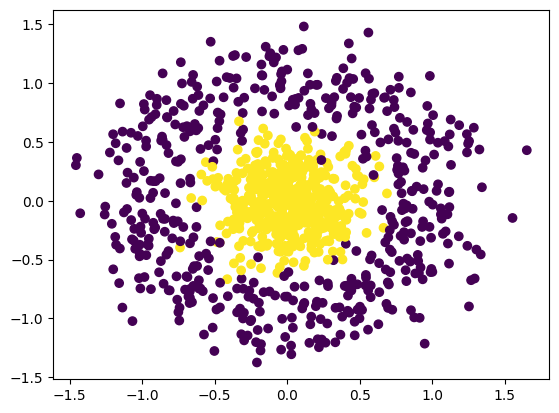

In [2]:
X, y = make_circles(n_samples=1000, noise=0.2, factor=0.2, random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

Gamma: 1


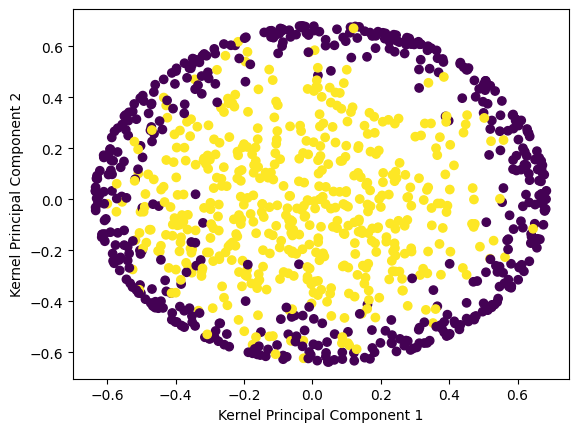

Gamma: 2


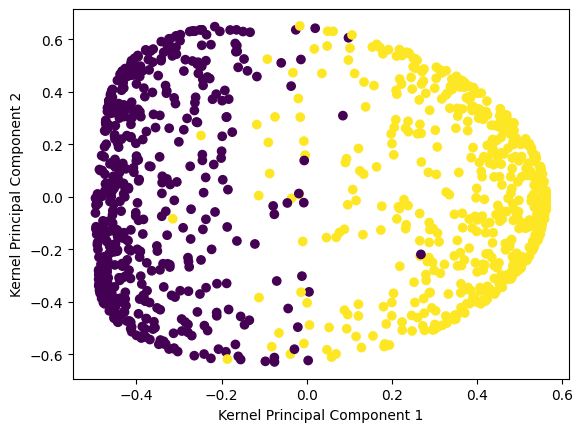

Gamma: 3


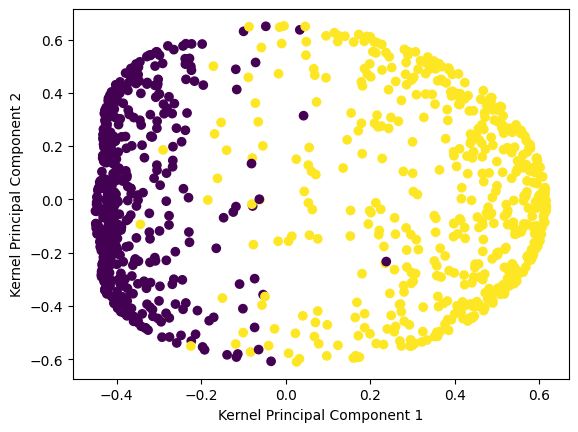

Gamma: 4


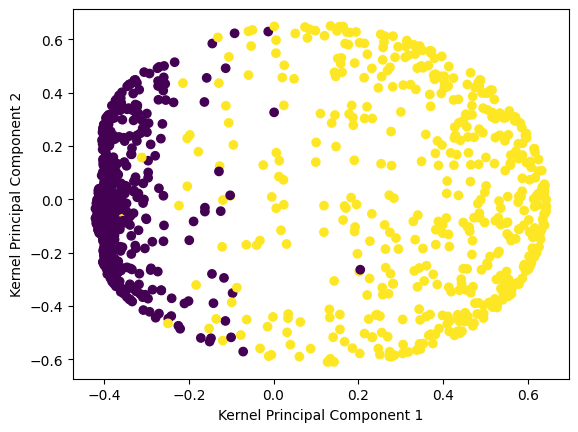

In [16]:
for i in range(1,5):
  print(f"Gamma: {i}")
  kpca = KernelPCA(kernel='rbf', gamma=i, n_components=np.unique(y).shape[0], random_state=0)

  kpc = kpca.fit_transform(X)

  plt.scatter(kpc[:,0],kpc[:,1], c=y)
  plt.xlabel("Kernel Principal Component 1")
  plt.ylabel("Kernel Principal Component 2")
  plt.show()

diciamo che le gamme 2, 3 e 4 sembrano attendibili, proviamo a schiacciare tutto su una dimensione

Gamma: 1


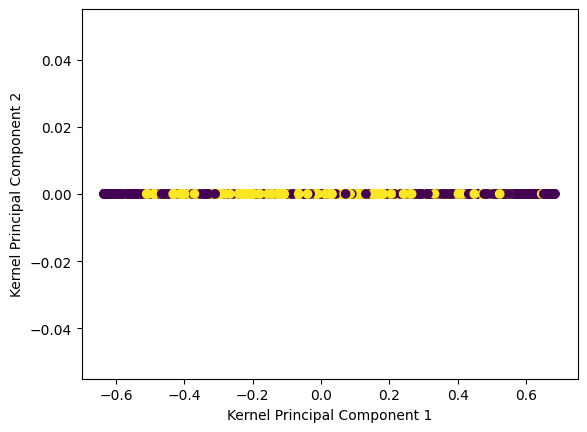

Gamma: 2


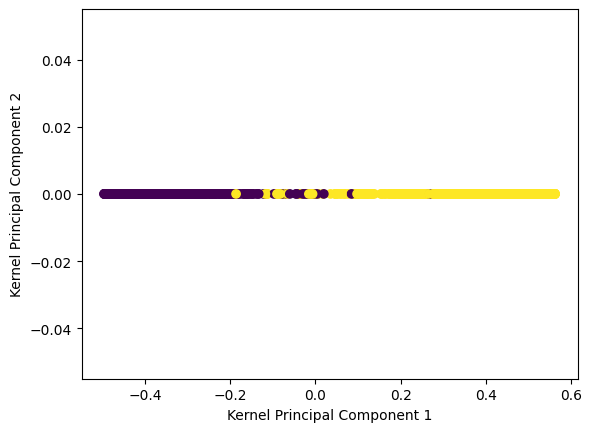

Gamma: 3


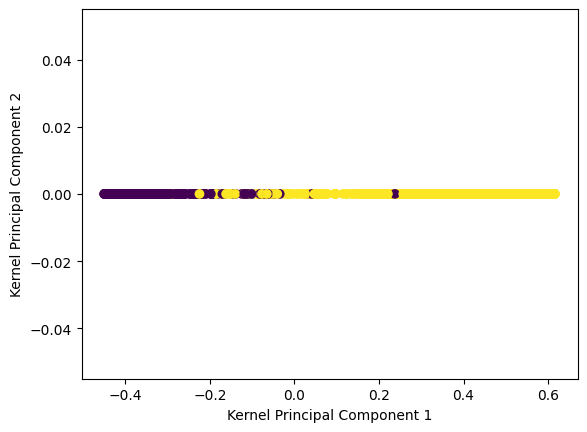

Gamma: 4


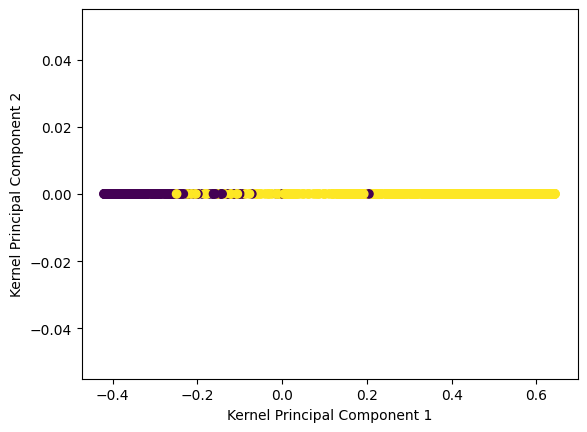

In [17]:
for i in range(1,5):
  print(f"Gamma: {i}")
  kpca = KernelPCA(kernel='rbf', gamma=i, n_components=np.unique(y).shape[0])

  kpc = kpca.fit_transform(X)

  plt.scatter(kpc[:,0],np.zeros((1000,1)), c=y)
  plt.xlabel("Kernel Principal Component 1")
  plt.ylabel("Kernel Principal Component 2")
  plt.show()

direi che posso addestrare il mio modello sulla componenti principale con gamma 2

In [19]:
kpc_train, kpc_test, y_train, y_test = train_test_split(kpc, y, test_size=0.2, random_state=0)  


In [29]:
def evaluate_predictions(predictions, y_true):
    cm = confusion_matrix(y_true, predictions)
    class_names = ['Classe 0', 'Classe 1']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(values_format='d')
    plt.show()
    
    perc_true_negative = cm[0,0]*100/(cm[0,0]+cm[0,1])
    perc_true_positive = cm[1,1]*100/(cm[1,0]+cm[1,1])
    
    print(f"Percentuale di veri negativi: {perc_true_negative:.2f}%")
    print(f"Percentuale di veri positivi: {perc_true_positive:.2f}%")
    
    print(classification_report(y_true, predictions, target_names=class_names))
    print(cm)
    
    fpr, tpr, _ = roc_curve(y_true, predictions)
    auc = roc_auc_score(y_true, predictions)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

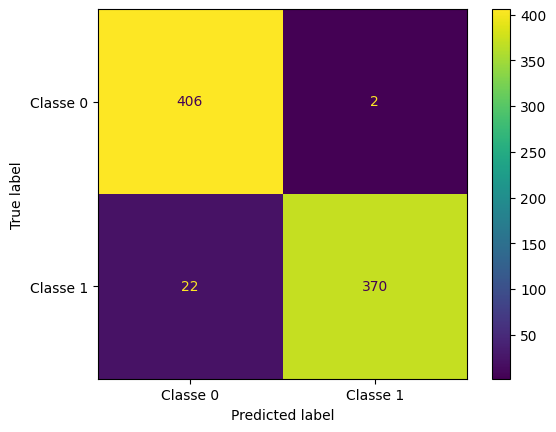

Percentuale di veri negativi: 99.51%
Percentuale di veri positivi: 94.39%
              precision    recall  f1-score   support

    Classe 0       0.95      1.00      0.97       408
    Classe 1       0.99      0.94      0.97       392

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800

[[406   2]
 [ 22 370]]


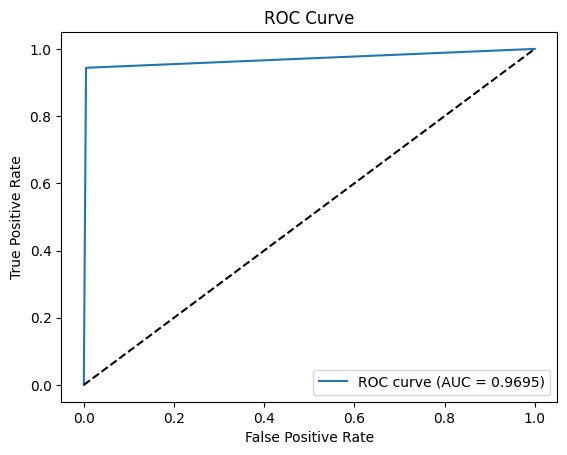

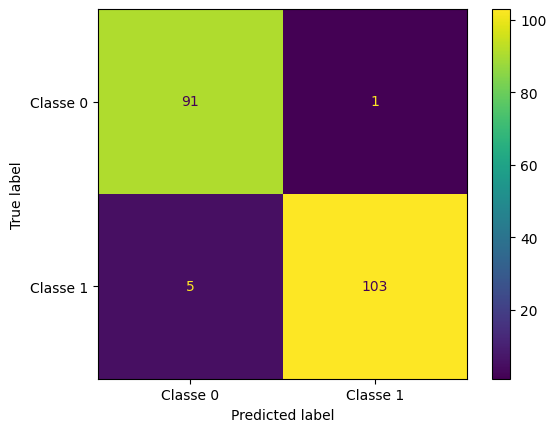

Percentuale di veri negativi: 98.91%
Percentuale di veri positivi: 95.37%
              precision    recall  f1-score   support

    Classe 0       0.95      0.99      0.97        92
    Classe 1       0.99      0.95      0.97       108

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

[[ 91   1]
 [  5 103]]


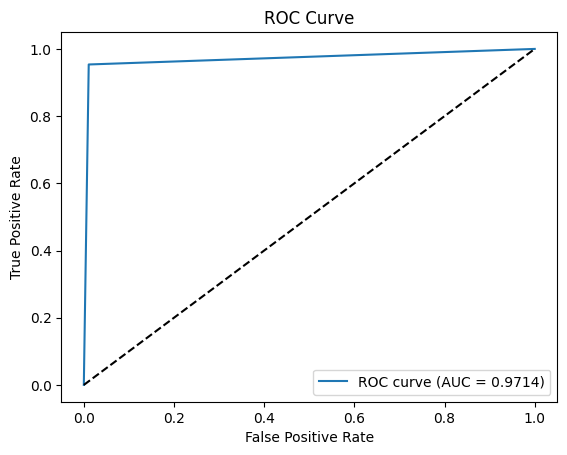

In [30]:
lr = LogisticRegression()
lr.fit(kpc_train, y_train)

y_pred_train = lr.predict(kpc_train)

y_pred = lr.predict(kpc_test)

evaluate_predictions(y_pred_train, y_train)
evaluate_predictions(y_pred, y_test)
